<a href="https://colab.research.google.com/github/delowerhossentuhin/CVPR/blob/main/MID/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os # for file handling
import numpy as np # for calculating of manhattan distance
import matplotlib.pyplot as plt # for visualizing
from IPython import display # to clear previous image output before showing a new one.
import time # to pause between image displays
from sklearn.model_selection import KFold # for 5 fold cross validation
import cv2  # for image reshape

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Labels and Images Load, reshaped and Store**

In [3]:
def load_image_labels(dataset_path=("/content/drive/MyDrive/Project and Coding/Computer Vision and Pattern Recognition/animals")):
  img_dataset=[]
  labels=[]
  img_class=os.listdir(dataset_path)
  for classes in img_class:
    class_path=os.path.join(dataset_path,classes)
    images=os.listdir(class_path)
    for img in images:
      img_path=os.path.join(class_path,img)
      img_path=cv2.imread(img_path)
      img_path=cv2.resize(img_path,(128,128))
      img_path=img_path.flatten()
      img_dataset.append(img_path)
      labels.append(classes)
  return np.array(img_dataset),np.array(labels)

# **Calculating Manhattan Distance**

In [4]:
def manhattan_distance(x1,x2):
  return np.sum(np.abs(x1.astype(int)-x2.astype(int)))

# **K Nearest Neighbours**

In [5]:
def knn_predict(X_train,X_test,Y_train,k):
  prediction=[]
  for each_sample in X_test:
    distance=[manhattan_distance(each_sample,train_sample) for train_sample in X_train] # distance for Manhattan Distance
    sorted_index=np.argsort(distance) # return index value after sorting based on distance in ascending ored
    top_label=Y_train[sorted_index[:k]]
    top_label,count=np.unique(top_label,return_counts=True) # unique labels and their frequencies
    temp=np.argmax(count) # return the index value of top frequencies
    predicted_label=top_label[temp]
    prediction.append(predicted_label)
  return prediction

# **Five Fold Cross Validation**

In [6]:
def cross_validate_knn(X,y,K,folds=5):
  kfold=KFold(n_splits=folds,shuffle=True,random_state=42)
  total=[]
  accuracies=[]
  st_dev=[]
  for k in K:
    fold_acc=[]
    for train,test in kfold.split(X): # train,test--->index values based on split
      X_train,X_test=X[train],X[test]
      Y_train,Y_test=y[train],y[test]
      y_pred=knn_predict(X_train,X_test,Y_train,k)
      acc=np.mean(y_pred==Y_test)
      fold_acc.append(acc)
    total.append(fold_acc)
    accuracies.append(np.mean(fold_acc))
    st_dev.append(np.std(fold_acc))
  return total, accuracies, st_dev

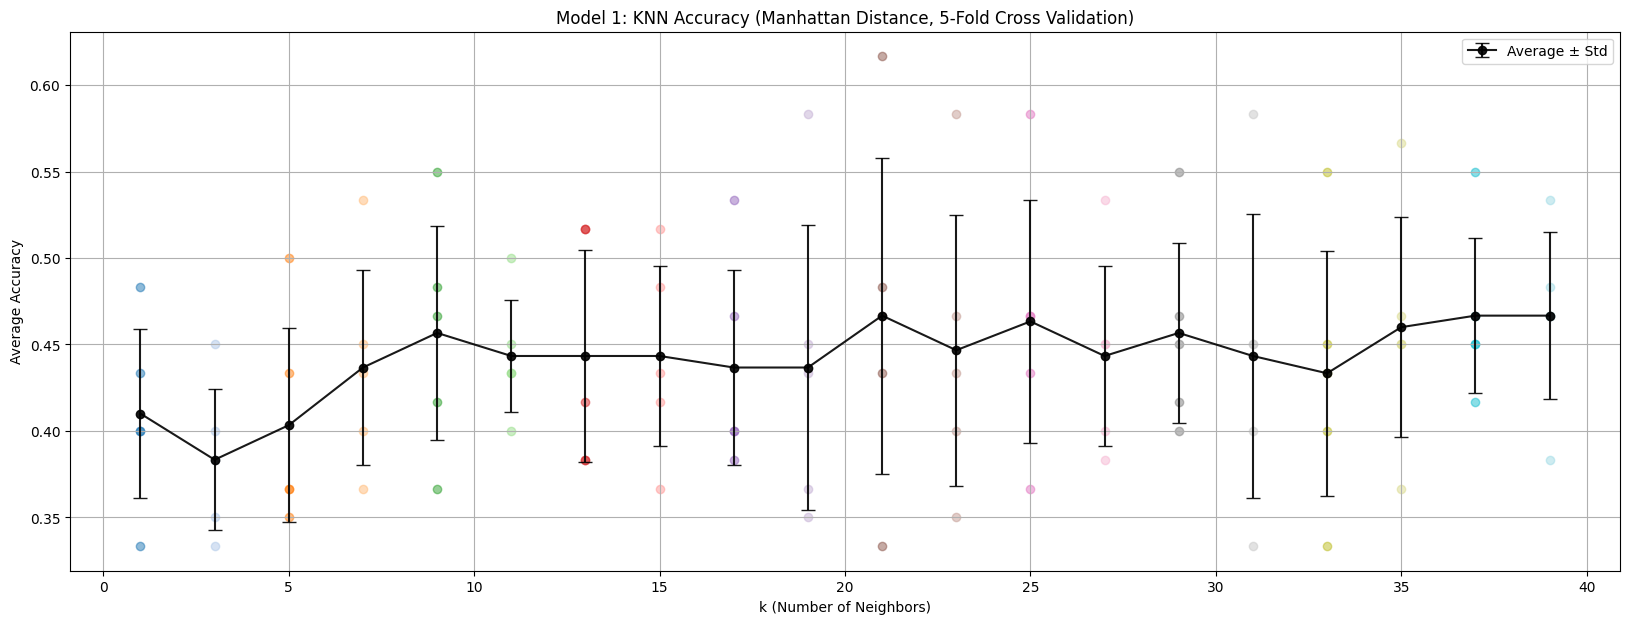

In [7]:
X,y=load_image_labels()
K=np.arange(1, 40, 2)
total,accuracies,st_dev=cross_validate_knn(X,y,K)
plt.figure(figsize=(20, 7))
cmap=plt.get_cmap('tab20') # Get distinct colors from a colormap (like 'tab10' or 'Set1')
num_colors=len(K)
for i,k in enumerate(K):  # Plot 5-fold accuracy points for each k with a unique color
    x_vals=[k]*len(total[i])
    y_vals=total[i]
    color=cmap(i % num_colors)  # wrap around if more than 10 k's
    plt.scatter(x_vals,y_vals,color=color,alpha=0.5)
# Plot average accuracy with standard deviation
plt.errorbar(K, accuracies, yerr=st_dev, fmt='-o', capsize=5, color='black', label='Average ± Std', alpha=0.9)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average Accuracy")
plt.title("Model 1: KNN Accuracy (Manhattan Distance, 5-Fold Cross Validation)")
plt.grid(True)
plt.legend()
plt.show()
